In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency

In [9]:
df = pd.read_csv('../MachineLearningRating_v3.txt',delimiter='|')
print(df.head(10))

/tmp/ipykernel_10951/2311303730.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../MachineLearningRating_v3.txt',delimiter='|')


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   
5               145247     12827  2015-01-01 00:00:00             True   
6               145247     12827  2015-04-01 00:00:00             True   
7               145247     12827  2015-06-01 00:00:00             True   
8               145247     12827  2015-08-01 00:00:00             True   
9               145245     12827  2015-03-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  E

In [13]:
# Fill or drop missing data based on your analysis in Task 1 and 2
df = df.dropna(subset=['TotalPremium', 'TotalClaims'])
df['Province'] = df['Province'].fillna('Unknown')
df['Gender'] = df['Gender'].fillna('Not Specified')
print(df['Gender'])


0          Not specified
1          Not specified
2          Not specified
3          Not specified
4          Not specified
               ...      
1000093             Male
1000094             Male
1000095             Male
1000096             Male
1000097             Male
Name: Gender, Length: 1000098, dtype: object


In [14]:
# Group by Province and calculate the mean risk (using TotalPremium as a proxy for risk)
grouped_by_province = df.groupby('Province')['TotalPremium'].mean()

# Use ANOVA (Analysis of Variance) to test for differences across multiple groups
f_stat, p_value = stats.f_oneway(*(df[df['Province'] == province]['TotalPremium'] for province in df['Province'].unique()))

if p_value < 0.05:
    print("Reject the null hypothesis: There are significant risk differences across provinces")
else:
    print("Fail to reject the null hypothesis: There are no significant risk differences across provinces")


Reject the null hypothesis: There are significant risk differences across provinces


In [15]:
# Group by PostalCode and calculate the mean risk (TotalPremium)
grouped_by_zip = df.groupby('PostalCode')['TotalPremium'].mean()

# Use ANOVA for multiple zip code groups
f_stat_zip, p_value_zip = stats.f_oneway(*(df[df['PostalCode'] == zip_code]['TotalPremium'] for zip_code in df['PostalCode'].unique()))

if p_value_zip < 0.05:
    print("Reject the null hypothesis: There are significant risk differences between zip codes")
else:
    print("Fail to reject the null hypothesis: There are no significant risk differences between zip codes")


Reject the null hypothesis: There are significant risk differences between zip codes


In [16]:
# Use TotalPremium - TotalClaims as a proxy for margin
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

# Test margin differences between zip codes
f_stat_margin, p_value_margin = stats.f_oneway(*(df[df['PostalCode'] == zip_code]['Margin'] for zip_code in df['PostalCode'].unique()))

if p_value_margin < 0.05:
    print("Reject the null hypothesis: There are significant margin differences between zip codes")
else:
    print("Fail to reject the null hypothesis: There are no significant margin differences between zip codes")


Fail to reject the null hypothesis: There are no significant margin differences between zip codes


In [17]:
# Filter gender-specific data
male_premiums = df[df['Gender'] == 'Male']['TotalPremium']
female_premiums = df[df['Gender'] == 'Female']['TotalPremium']

# Use t-test to compare the means of two independent groups (Male vs Female)
t_stat_gender, p_value_gender = stats.ttest_ind(male_premiums, female_premiums, nan_policy='omit')

if p_value_gender < 0.05:
    print("Reject the null hypothesis: There are significant risk differences between men and women")
else:
    print("Fail to reject the null hypothesis: There are no significant risk differences between men and women")


Reject the null hypothesis: There are significant risk differences between men and women


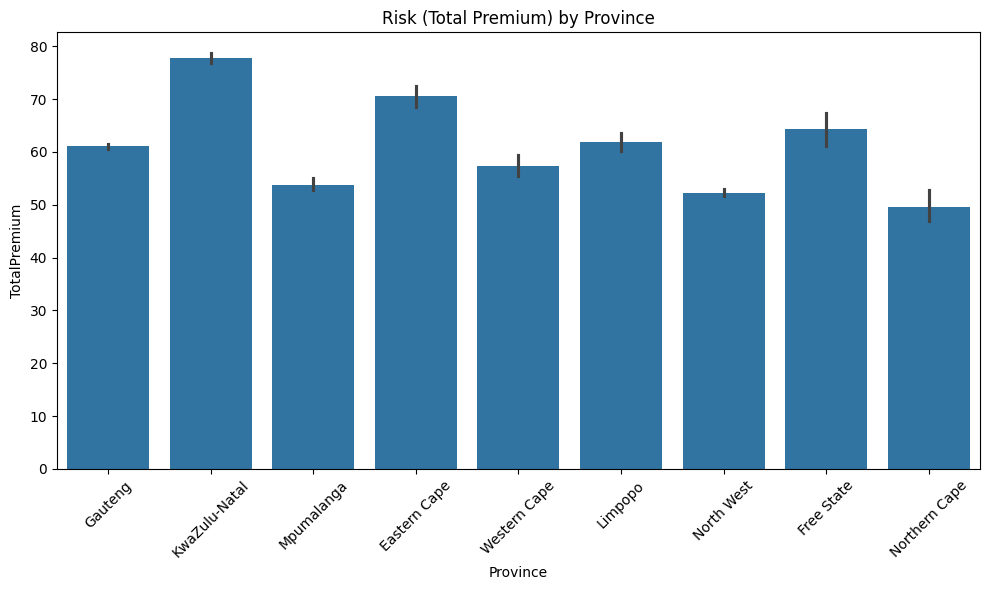

In [27]:
plt.figure(figsize=(10, 6))  
sns.barplot(x='Province', y='TotalPremium', data=df)
plt.xticks(rotation=45)
plt.title('Risk (Total Premium) by Province')
plt.tight_layout() 
plt.show()


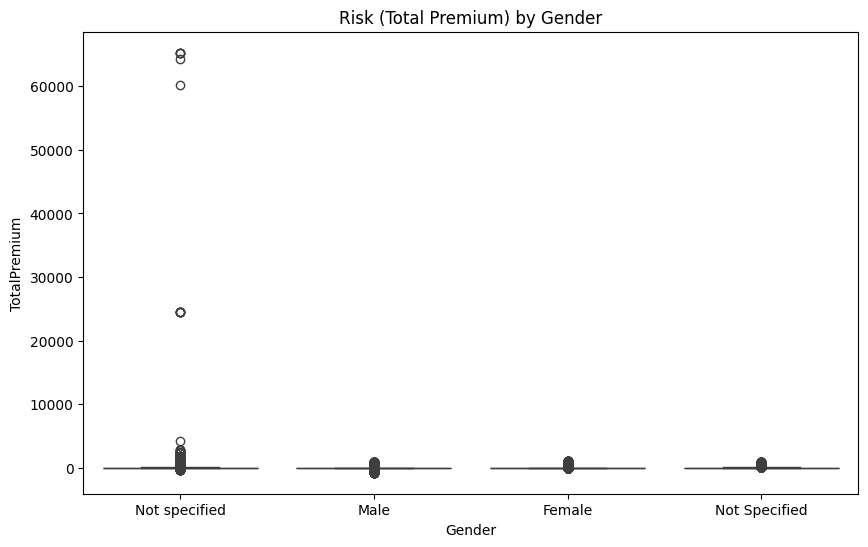

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='TotalPremium', data=df)
plt.title('Risk (Total Premium) by Gender')
plt.show()
